In [81]:
import torch
import pickle # 파이썬 객체를 파일 형태로 저장할 때 사용
import matplotlib.pyplot as plt

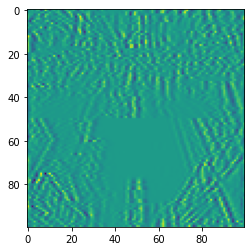

In [82]:
broken_image = torch.FloatTensor(pickle.load(open('./broken_image_t.p', 'rb'), encoding='latin1'))
plt.imshow(broken_image.view(100,100))

In [83]:
print(broken_image)
print(broken_image.size())
print(broken_image.size(0))

tensor([-0.0095, -0.0004,  0.0094,  ..., -0.0014, -0.0001, -0.0036])
torch.Size([10000])
10000


In [91]:
## 이미지를 오염시키는 함수
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

In [92]:
## 가설 텐서와 오염된 이미지 사이의 오차 계산 함수
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image)

In [93]:
## 무작위 텐서 생성과 학습률 설정
random_tensor = torch.randn(10000, dtype = torch.float)

In [94]:
lr = 0.8

In [88]:
print(random_tensor)
print(random_tensor.size())

tensor([-0.8661, -0.2439,  0.3977,  ..., -0.0513, -0.6010, -1.2963])
torch.Size([10000])


In [95]:
## 경사하강법 구현
for i in range(0, 20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)

    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 12.394784927368164
Loss at 1000 = 1.1872215270996094
Loss at 2000 = 0.5518068075180054
Loss at 3000 = 0.37963151931762695
Loss at 4000 = 0.30004817247390747
Loss at 5000 = 0.25159043073654175
Loss at 6000 = 0.2166627049446106
Loss at 7000 = 0.18885652720928192
Loss at 8000 = 0.16529187560081482
Loss at 9000 = 0.14445392787456512
Loss at 10000 = 0.12546251714229584
Loss at 11000 = 0.10777193307876587
Loss at 12000 = 0.09103017300367355
Loss at 13000 = 0.07500028610229492
Loss at 14000 = 0.059519682079553604
Loss at 15000 = 0.04447304457426071
Loss at 16000 = 0.029780065640807152
Loss at 17000 = 0.021153053268790245
Loss at 18000 = 0.021165989339351654
Loss at 19000 = 0.021167637780308723


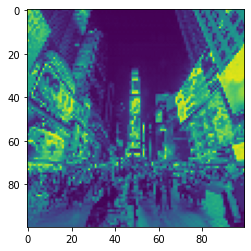

In [96]:
plt.imshow(random_tensor.view(100,100).data)

In [38]:
hypothesis = weird_function(random_tensor)
loss = distance_loss(hypothesis, broken_image)
loss.backward()

In [39]:
with torch.no_grad(): # 직접 경사하강법을 구현하기 때문에 자동 기울기 계산 비활성화

SyntaxError: unexpected EOF while parsing (<ipython-input-39-ff7204b421ff>, line 1)

In [41]:
print('loss.backward()에서 계산한 loss의 기울기(loss의 최댓점):',random_tensor.grad)

loss.backward()에서 계산한 loss의 기울기(loss의 최댓점): tensor([-0.0853, -0.5725, -0.3225,  ...,  0.0706,  0.0354,  0.0062])


In [45]:
random_tensor = random_tensor - lr*random_tensor.grad

In [50]:
# for문이 1000번 반복될 때마다 오차를 출력
if i % 1000 == 0:
    print('Loss at {} = {}'.format(i, loss.item()))

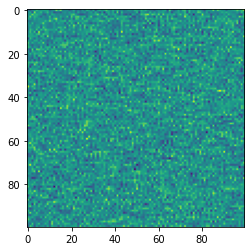

In [51]:
plt.imshow(random_tensor.view(100,100).data)